In [134]:
___Author___='LumberJack Jyss'

# LSTM FROM KEREAS

In [ ]:
#importing required libraries
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [136]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [137]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [138]:
# Setting the data
start = pd.to_datetime('2016-03-31')
end = pd.to_datetime('2019-03-19')

In [ ]:
data = web.DataReader('AMZN','yahoo',start,end)
#spy_etf = web.DataReader('SPY','yahoo',start,end)
data = data.drop(['High','Low','Close','Open','Volume'],axis=1)
data.tail()

In [175]:
#spy_etf = spy_etf.drop(['High','Low','Close'],axis=1)
#spy_etf.head()

In [176]:
#data['Date'] = data.index
#data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.head()

,Adj Close
Date,
2016-03-31,593.640015
2016-04-01,598.500000
2016-04-04,593.190002
2016-04-05,586.140015
2016-04-06,602.080017


In [178]:
dataset = pd.DataFrame()
#dataset = pd.concat([data,spy_etf],axis=1)
#dataset.columns = ['Open_AMZN','Volume_AMZN','Adj Close_AMZN','Open_SPY','Volume_SPY','Adj Close_SPY']
dataset['Adj Close_AMZN'] = data['Adj Close'].shift(-1)
dataset = dataset.iloc[:-1,:]
dataset.tail()

,Adj Close_AMZN
Date,
2019-03-12,1690.810059
2019-03-13,1686.219971
2019-03-14,1712.359985
2019-03-15,1742.150024
2019-03-18,1761.849976


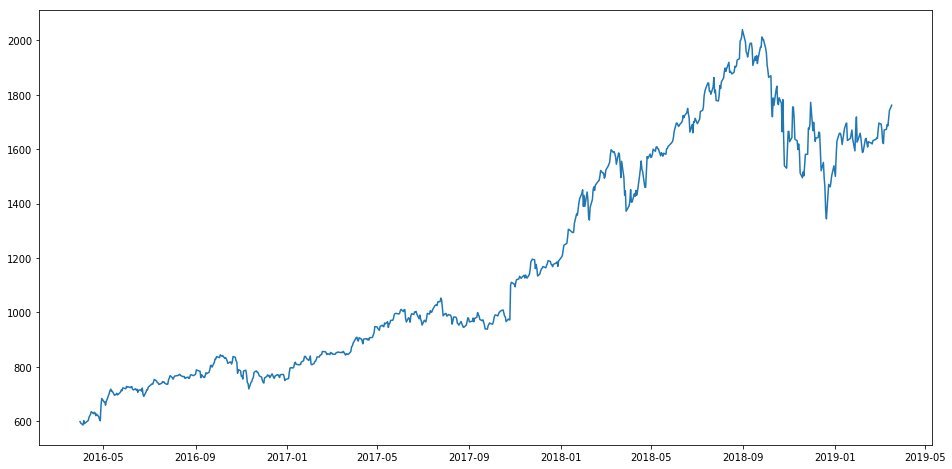

In [179]:
#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close_AMZN'], label='Close Price history')

In [180]:
#creating dataframe
#data = df.sort_index(ascending=True, axis=0)
#new_data = pd.DataFrame(index=range(0,len(dataset)),columns=['Date','Adj Close_AMZN'])
#for i in range(0,len(dataset)):
#    new_data['Date'][i] = dataset['Date'][i]
#    new_data['Adj Close_AMZN'][i] = dataset['Adj Close_AMZN'][i]
#new_data.head()

In [181]:
#setting index
#new_data.index = new_data.Date
#new_data.drop('Date', axis=1, inplace=True)

In [182]:
#new_data.head()

In [183]:
#creating train and test sets
#dataset = dataset.values
#len(dataset)

In [184]:
dataset.head()

,Adj Close_AMZN
Date,
2016-03-31,598.500000
2016-04-01,593.190002
2016-04-04,586.140015
2016-04-05,602.080017
2016-04-06,591.429993


In [185]:
#y = dataset['Adj Close_AMZN'].to_frame()
#X = dataset
#X = X.drop('Adj Close_AMZN',axis=1)
train = dataset[:596]
valid = dataset[596:]

In [186]:
dataset.shape,train.shape,valid.shape

((746, 1), (596, 1), (150, 1))

In [187]:
train.head(1),train.tail(1),valid.head(1),valid.tail(1)

(            Adj Close_AMZN
 Date                      
 2016-03-31           598.5,             Adj Close_AMZN
 Date                      
 2018-08-09     1886.300049,             Adj Close_AMZN
 Date                      
 2018-08-10     1896.199951,             Adj Close_AMZN
 Date                      
 2019-03-18     1761.849976)

In [188]:
#make predictions
preds = []
for i in range(0,150):
    a = train['Adj Close_AMZN'][len(train)-150+i:].sum() + sum(preds)
    b = a/150
    preds.append(b)

In [189]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close_AMZN'])-preds),2)))
rms

195.46386306570002

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


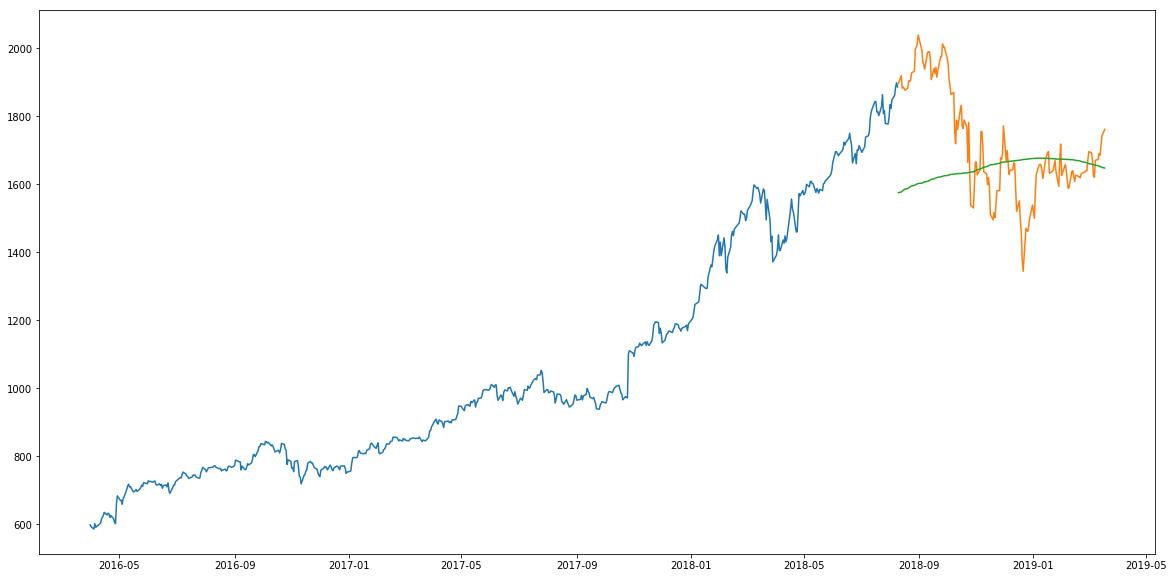

In [190]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close_AMZN'])
plt.plot(valid[['Adj Close_AMZN', 'Predictions']])

In [211]:
train = dataset[:596]
valid = dataset[596:]

In [212]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [213]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [214]:
x_train

array([[0.00850436, 0.00485079, 0.        , ..., 0.08563543, 0.09353434,
        0.07762649],
       [0.00485079, 0.        , 0.01096761, ..., 0.09353434, 0.07762649,
        0.07239724],
       [0.        , 0.01096761, 0.0036398 , ..., 0.07762649, 0.07239724,
        0.0838121 ],
       ...,
       [0.69865212, 0.6811617 , 0.68884043, ..., 0.85122854, 0.86805837,
        0.87819342],
       [0.6811617 , 0.68884043, 0.68504235, ..., 0.86805837, 0.87819342,
        0.89473431],
       [0.68884043, 0.68504235, 0.6799576 , ..., 0.87819342, 0.89473431,
        0.90299099]])

In [215]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [216]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(1))

In [217]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 129s - loss: 0.0034
Epoch 2/10
 - 122s - loss: 0.0014
Epoch 3/10
 - 121s - loss: 6.7655e-04
Epoch 4/10
 - 121s - loss: 7.0168e-04
Epoch 5/10
 - 121s - loss: 9.0633e-04
Epoch 6/10
 - 122s - loss: 6.0848e-04
Epoch 7/10
 - 121s - loss: 4.4409e-04
Epoch 8/10
 - 121s - loss: 4.1152e-04
Epoch 9/10
 - 125s - loss: 5.8104e-04
Epoch 10/10
 - 124s - loss: 2.8686e-04


In [218]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [219]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [220]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [221]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

Adj Close_AMZN    45.149953
dtype: float64

In [222]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close_AMZN'])
plt.plot(valid[['Adj Close_AMZN','Predictions']])

Exception: Data must be 1-dimensional